In [ ]:
# 필요한 라이브러리 가져오기, 한글 폰트 설치하기
# 세션 실행 후 세션 재 시작 필수
!pip install konlpy transformers sentencepiece nltk wordcloud matplotlib
!apt-get install -y fonts-nanum
!fc-cache -fv
!pip install kss

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


문학 텍스트 분석 프로그램
분석할 텍스트를 입력하세요:
사람들을 너무 많이 만나면 말에 취해서 멀미가 나고, 꽃들을 너무 많이 대하면 향기에 취해서 멀미가 나지. 살아 있는 것은 아픈 것, 아름다운 것은 어지러운 것. 너무 많아도 싫지 않은 꽃을 보면서 나는 더욱 사람들을 사랑하기 시작하지. 사람들에게도 꽃처럼 향기가 있다는 걸 새롭게 배우기 시작하지.

워드 클라우드 생성 중...


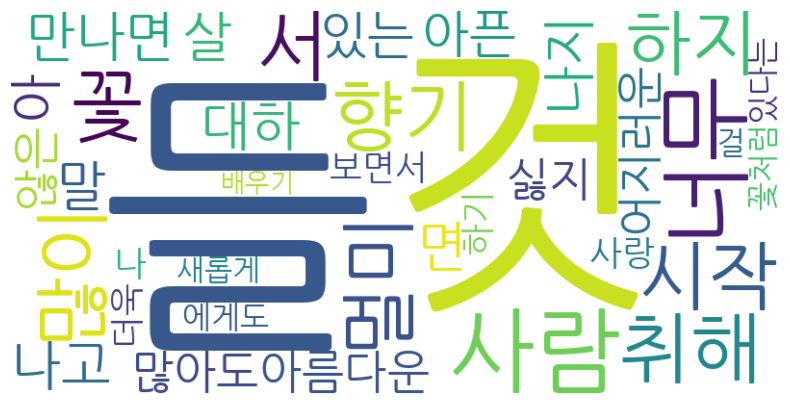


주요 키워드:
너무, 것은, 많이, 멀미가, 사람들을, 시작하지, 취해서, 꽃들을, 꽃을, 꽃처럼

감정 분석 결과:
문장: 사람들을 너무 많이 만나면 말에 취해서 멀미가 나고, 꽃들을 너무 많이 대하면 향기에 취해서 멀미가 나지.
감정 분석 결과: [{'label': 'POSITIVE', 'score': 0.5074039101600647}]

문장: 살아 있는 것은 아픈 것, 아름다운 것은 어지러운 것.
감정 분석 결과: [{'label': 'POSITIVE', 'score': 0.7206478118896484}]

문장: 너무 많아도 싫지 않은 꽃을 보면서 나는 더욱 사람들을 사랑하기 시작하지.
감정 분석 결과: [{'label': 'POSITIVE', 'score': 0.7154715061187744}]

문장: 사람들에게도 꽃처럼 향기가 있다는 걸 새롭게 배우기 시작하지.
감정 분석 결과: [{'label': 'POSITIVE', 'score': 0.7449824213981628}]


전처리된 텍스트:
사람 들 너무 많이 만나면 말 취해 서 멀미 나고 , 꽃 들 너무 많이 대하 면 향기 취해 서 멀미 나지 . 살 아 있는 것 아픈 것 , 아름다운 것 어지러운 것 . 너무 많아도 싫지 않은 꽃 보면서 나 더욱 사람 들 사랑 하기 시작 하지 . 사람 들 에게도 꽃처럼 향기 있다는 걸 새롭게 배우기 시작 하지 .


In [5]:
import nltk
import kss
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from konlpy.tag import Okt
from transformers import pipeline

import matplotlib.pyplot as plt

# NLTK 데이터 다운로드 및 경로 설정
nltk.download('stopwords')
nltk.download('punkt')

# 감정 분석 파이프라인
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    truncation=True
)

def preprocess_text(text):
    """Cleans and tokenizes Korean text."""
    okt = Okt()
    tokens = okt.morphs(text)  # Tokenize with Okt
    stop_words = set(["은", "는", "이", "가", "을", "를", "의", "에", "로", "와", "과", "한"])  # Korean stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def generate_wordcloud(text):
    """Generates a word cloud from the text."""
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)
    return wordcloud

def extract_keywords(text):
    """Extracts keywords using TF-IDF."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text])
    scores = zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return [word for word, score in sorted_scores[:10]]

def analyze_long_text(text):
    """Analyzes sentiment for each sentence in a long text."""
    sentences = kss.split_sentences(text)  # Use KSS for Korean sentence splitting
    results = []
    for sentence in sentences:
        if sentence.strip():  # 빈 문장 건너뛰기
            result = sentiment_pipeline(sentence[:512])  # 512 토큰 제한
            results.append((sentence, result))
    return results

# Colab-compatible script
if __name__ == "__main__":
    print("문학 텍스트 분석 프로그램")
    user_text = input("분석할 텍스트를 입력하세요:\n")

    if user_text.strip():
        # Text Preprocessing
        tokens = preprocess_text(user_text)
        processed_text = " ".join(tokens)

        # Word Cloud
        print("\n워드 클라우드 생성 중...")
        wordcloud = generate_wordcloud(processed_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

        # Keyword Extraction
        print("\n주요 키워드:")
        keywords = extract_keywords(user_text)
        print(", ".join(keywords))

        # Sentiment Analysis
        print("\n감정 분석 결과:")
        results = analyze_long_text(user_text)
        for sentence, sentiment in results:
            print(f"문장: {sentence}\n감정 분석 결과: {sentiment}\n")

        # Tokenized Text
        print("\n전처리된 텍스트:")
        print(processed_text)
    else:
        print("텍스트를 입력하지 않았습니다.")
